# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

Given that the solution of minimizing OLS is: 
$${\hat{\beta}=(x^tx)^{-1}x^tt}$$

The solution for minimizing WLS is: 
$${\hat{\beta}=(x^trx)^{-1}x^trt}$$

1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [1]:
import numpy as np

def calcWvec(data, r_n):
    x = data.iloc[:, 0:-1]
    y = data.iloc[:,-1]
    size = y.size
    ones = np.array([1]*size).reshape(-1,1)
    x_m = np.mat(np.append(ones, x.to_numpy(),1))
    y_m = np.mat(y.to_numpy().reshape(-1,1))
    #make diaganol of r
    w = np.mat(np.diagflat(r_n))

    B = (x_m.T*w*x_m).I * x_m.T  * w * y_m
    return B.T
    
def my_error(data, r_n):
    x = data.iloc[:, 0:-1]
    y = data.iloc[:,-1]
    size = y.size
    ones = np.array([1]*size).reshape(-1,1)
    x_m = np.mat(np.append(ones, x.to_numpy(),1))
    y_m = np.mat(y.to_numpy().reshape(-1,1))
    w = calcWvec(data, r_n)
    
    e = 0
    for i in range(len(y_m)):
        t_n = y_m[i]
        x_n = x_m[i]
        est = w * x_n.T
        e_n = r_n[i] * (t_n - est)**2
        e += e_n
    return e/2

### my_LR starts here
def my_LR(data,r_n):
    for r in r_n:
        w = calcBvec(data, r)
        error = my_error(data, r_n)
    
    return w, error, r_n

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd

In [35]:
df = pd.read_csv('./HW2_LR.csv')
df.head(5)

,a,b,c,d,k,y
0,70.40,611.72,2679.33,-0.116531,0.408765,-9.804385e+05
1,297.79,172.91,8986.70,-0.668901,0.906781,1.343908e+06
2,213.93,423.22,1505.50,-0.573668,0.862750,-6.170783e+05
3,39.25,353.36,8332.22,-0.144505,0.730970,2.070210e+06
4,5.95,-174.07,3210.43,-0.157336,-0.175142,-7.709453e+05


C:\Users\caleb\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


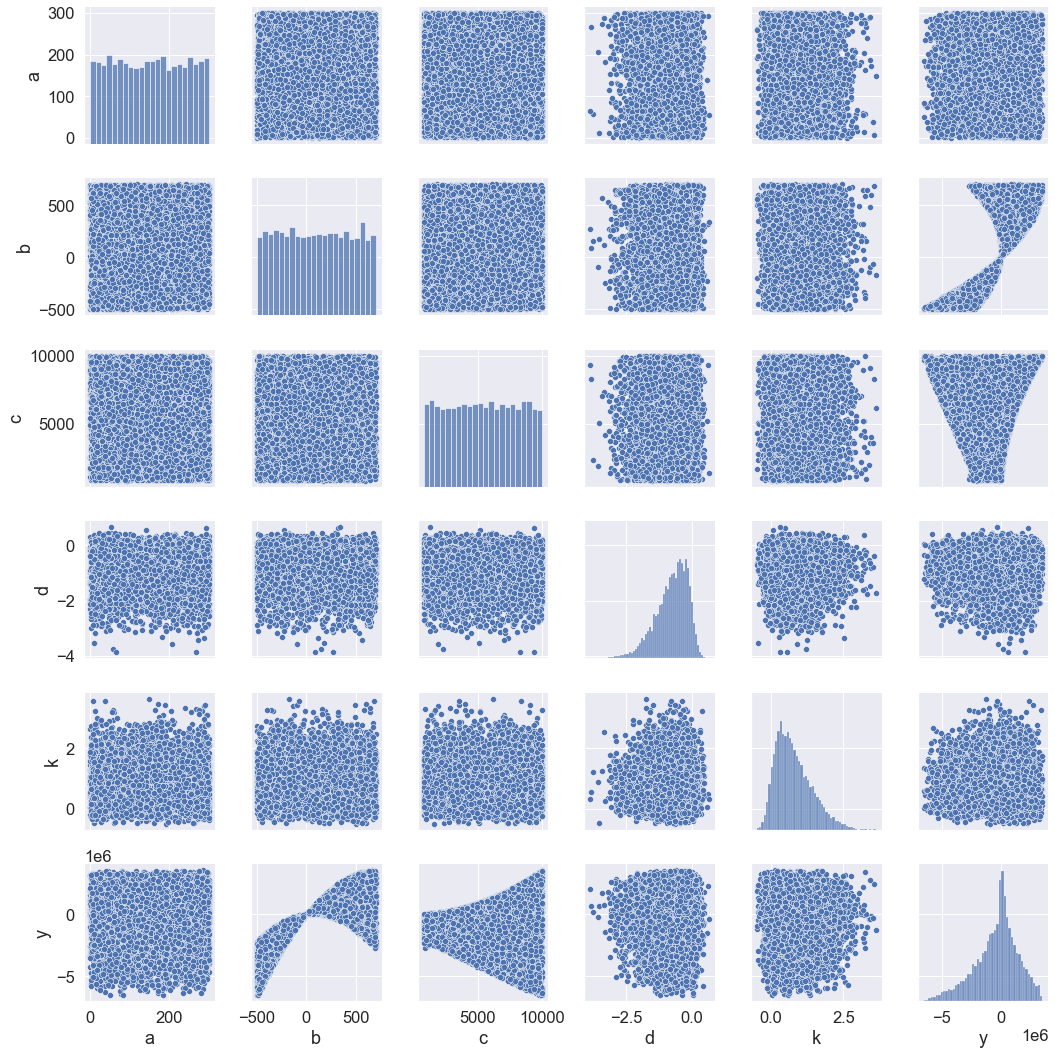

In [36]:
### EDA stars here
import seaborn as sns

cols = ['a', 'b', 'c', 'd', 'k', 'y']
sns.pairplot(df[cols],size=2.5)
plt.tight_layout()
plt.show()

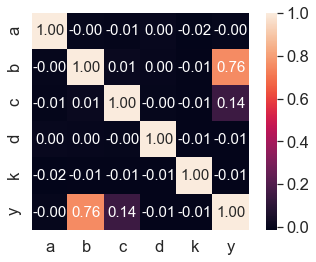

In [37]:
import numpy as np

cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

Although 'b' does not have a normal distribution, it is the only feature to have a strong correlation with the target 'y'. Therefore, only the feature 'b' should be used in the linear regression model. None of the features have a strong correlation with the other features and should be combined.

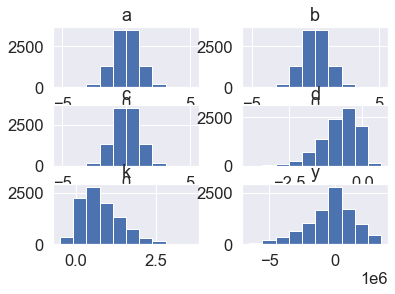

In [38]:
### Pre-processing starts here

#Scale uniform distributions
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
uniform_df=df[['a', 'b', 'c']]
scaler = QuantileTransformer(output_distribution='normal')
df_scale= scaler.fit_transform(uniform_df)
df['a'] = df_scale[:,0].reshape(-1,1)
df['b'] = df_scale[:,1].reshape(-1,1)
df['c'] = df_scale[:,2].reshape(-1,1)
df.hist()
plt.show()

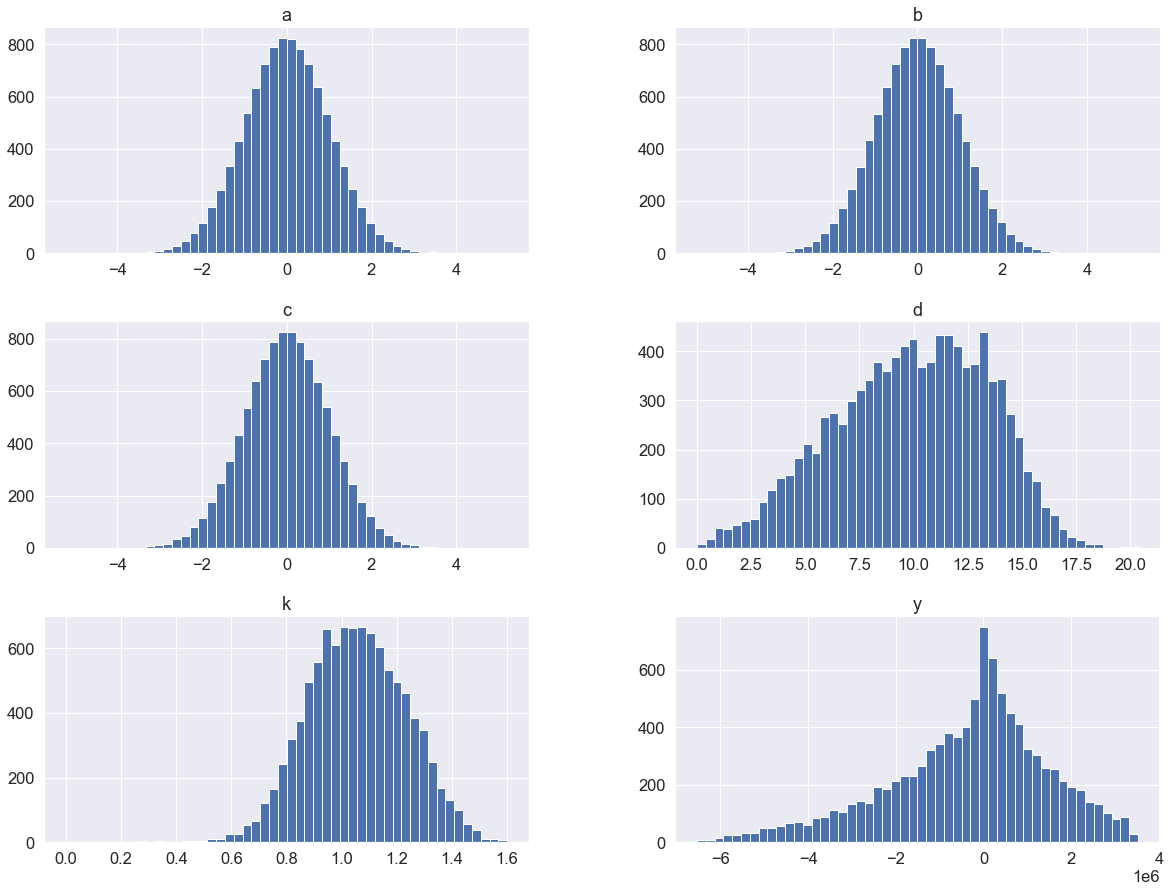

In [39]:
#Scale skewed data
rskew_df=df[['k']]
#Shift distribution to be positive
rskew_df += np.abs(rskew_df.to_numpy().min())
rskew_df= np.power((rskew_df),1/3)
df['k'] = rskew_df

lskew_df=df[['d']]
#Shift distribution to be positive
lskew_df += np.abs(lskew_df.to_numpy().min())
lskew_df= np.power((lskew_df),2)
df['d'] = lskew_df

df.hist(bins=50, figsize=(20,15))
plt.show()

In [40]:
#Finally scale normal distributions
from pandas.core.frame import DataFrame
scaler = StandardScaler()
scale = scaler.fit_transform(df)
f_df = DataFrame(scale, columns=['a','b','c','d','k','y'])

In [41]:
X = f_df[['b']]
y = f_df[['y']]
### Linear Regression Modeling starts here
LR = LinearRegression()
LR.fit(X, y)

y_train_pred = LR.predict(X)
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f' %(mean_squared_error(y,y_train_pred)))
#                                     mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('R^2 train: %.3f' %(r2_score(y,y_train_pred)))
#                                     r2_score(y_test,y_test_pred)))

MSE train: 0.449
R^2 train: 0.551


1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

In [10]:
### Visualization starts from here. 

### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [46]:
from sklearn.metrics import accuracy_score

In [156]:
### my_LDA starts here
# Assume target is last column
def my_LDA(df):
    X = df.iloc[:, 0:-1]
    y = df.iloc[:,-1]

    #Get target classes
    classes = y.unique()

    #Calculate feature means
    feature_means_per_class = pd.DataFrame(columns=classes)
    class_name = df.columns[-1]
    for i in df.groupby(class_name):
        class_i = i[0]
        class_rows = i[1].iloc[:,0:-1]
        feature_means_per_class[class_i] = class_rows.mean()

    #Calculate in class scatter
    num_features = X.shape[1]
    Sw = np.zeros((num_features, num_features))
    for i in df.groupby(class_name):
        class_i = i[0]
        class_rows = i[1]
        features = class_rows.iloc[:,0:-1]

        #Calculate Si
        Si = np.zeros((num_features, num_features))
        for j in features.iterrows():
            idx_j = j[0]
            row_j = j[1]
            x = row_j.values
            mean = feature_means_per_class[class_i].values
            x = x.reshape(-1,1)
            mean = mean.reshape(-1,1)

            #(x-m)(x-m)^T
            var = x - mean
            varT = var.T
            dot = var.dot(varT)
            Si = Si + dot
        Sw = Sw + Si

    overall_means = X.mean()
    #Calculate between class scatter
    Sb = np.zeros((num_features, num_features))
    for class_label in feature_means_per_class:
        count = df.iloc[:,-1].value_counts()[class_label]

        mean_class  = feature_means_per_class[class_label].values
        mean_class = mean_class.reshape(-1,1)

        mean = overall_means.values
        mean = mean.reshape(-1,1)
        weighted_mean_diff = (mean_class - mean).dot((mean_class - mean).T)
        weighted_mean_diff *= count
        Sb = Sb + weighted_mean_diff

    #Find eigenvectors/values (W)
    eig = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))
    eig_list = []
    for i in range(len(eig[0])):
        eig_list.append((np.abs(eig[0][i]), eig[1][:,i]))
    eig_list.sort(key=lambda y: y[0], reverse=True)

    #Get W, only 1 dimension since only first eig value is large
    W = eig_list[0][1].reshape(-1,1).real

    #Make model
    X_lda = np.array(X.dot(W))
    
    #Make predictions
    pred = [1 if x>=-1 else 0 for x in X_lda]
    return pred

2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [13]:
### my_Perceptron starts here

2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [14]:
### my_LogisticRegression starts here

2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

In [15]:
### EDA stars here

In [16]:
### Pre-processing starts here

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

df = pd.read_csv('./heart.csv')

In [155]:
### LDA starts here
clf1= LinearDiscriminantAnalysis()
columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']]
y = df[['output']]

clf1.fit_transform(X,y)
y_pred = clf1.predict(X)
clf1_accuracy = accuracy_score(y,y_pred)
clf1_accuracy

C:\Users\caleb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8415841584158416

In [ ]:
### Perceptron starts here
clf2 = Perceptron(eta0=0.5, random_state=1,max_iter=1000)

X = df[['sex', 'cp', 'exng', 'slp', 'caa', 'thall']]
y = df[['output']]

clf2.fit(X,y)
print(clf2.coef_)
y_pred = clf2.predict(X)
clf2_accuracy = accuracy_score(y,y_pred)
clf2_accuracy

In [ ]:
### Logistic Regression starts here
clf3 = LogisticRegression()

clf3_accuracy = accuracy_score(y,y_pred)

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [158]:
clf4= my_LDA(df)

clf4_accuracy = accuracy_score(y,y_pred)
clf4_accuracy

0.8415841584158416

In [ ]:
clf5= my_LDA()

clf5_accuracy = accuracy_score(y,y_pred)

In [ ]:
clf6= my_LDA()

clf6_accuracy = accuracy_score(y,y_pred)

In [ ]:
result_table = pd.DataFrame({'Model',['clf1','clf2','clf3','clf4','clf5','clf6'],
                             'Accuracy':[clf1_accuracy,clf2_accuracy,clf3_accuracy,
                                        clf4_accuracy,clf5_accuracy,clf6_accuracy]})
result_table